## Create a collection of songs & audio features with Spotify web API

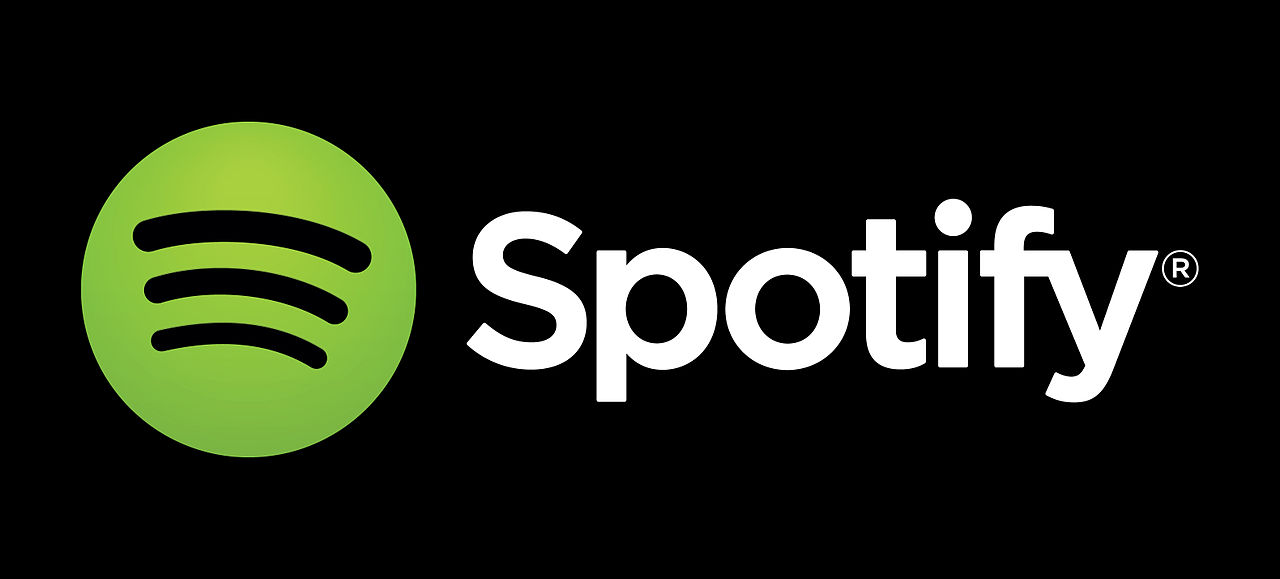

In [7]:
from IPython.display import Image
Image(filename='Spotify_logo.jpg') 

In [ ]:
#To make run all you ask in one cell, not only the last required
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#Import spotify Library
import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials

In [3]:
#Initialize SpotiPy with user credentials
secrets_file = open("secrets.txt","r")
string = secrets_file.read()
string.split('\n')

secrets_dict={}
for line in string.split('\n'):
secrets_dict[line.split(':')[0]]=line.split(':')[1]

 #Initialize SpotiPy with user credentials

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['cid'],
                                                           client_secret=secrets_dict['csecret']))

#### Get a list of 10.000 songs from Spotify
10.000 song play list of all genres. I will use this for a recommendation system to discover new music that you may love

In [7]:
playlist = sp.user_playlist_tracks("spotify",'6yPiKpy7evrwvZodByKvM9' )

In [8]:
playlist

{'href': 'https://api.spotify.com/v1/playlists/6yPiKpy7evrwvZodByKvM9/tracks?offset=0&limit=100&additional_types=track',
 'items': [{'added_at': '2017-02-27T01:38:09Z',
   'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/12160726861'},
    'href': 'https://api.spotify.com/v1/users/12160726861',
    'id': '12160726861',
    'type': 'user',
    'uri': 'spotify:user:12160726861'},
   'is_local': False,
   'primary_color': None,
   'track': {'album': {'album_type': 'album',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/50Lr1puweM1hFsF1LpIZLM'},
       'href': 'https://api.spotify.com/v1/artists/50Lr1puweM1hFsF1LpIZLM',
       'id': '50Lr1puweM1hFsF1LpIZLM',
       'name': 'WhoMadeWho',
       'type': 'artist',
       'uri': 'spotify:artist:50Lr1puweM1hFsF1LpIZLM'},
      {'external_urls': {'spotify': 'https://open.spotify.com/artist/1cS5EoXVqz7aON00AkVBBA'},
       'href': 'https://api.spotify.com/v1/artists/1cS5EoXVqz7aON00AkVBBA',

In [9]:
# Spotify only return 100 tracks by default. To get the complet tracks we use the 'next' function.

In [10]:
from time import sleep
def get_playlist_tracks(playlist_id):
    results = sp.user_playlist_tracks("spotify",playlist_id)
    tracks = results['items']
    while results['next']!=None:
        results = sp.next(results)
        sleep(0.5)
        tracks = tracks + results['items']
    return tracks       

In [11]:
my_playlist= get_playlist_tracks('6yPiKpy7evrwvZodByKvM9')

In [12]:
my_playlist  #this is the list I'm going to work with!

[{'added_at': '2017-02-27T01:38:09Z',
  'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/12160726861'},
   'href': 'https://api.spotify.com/v1/users/12160726861',
   'id': '12160726861',
   'type': 'user',
   'uri': 'spotify:user:12160726861'},
  'is_local': False,
  'primary_color': None,
  'track': {'album': {'album_type': 'album',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/50Lr1puweM1hFsF1LpIZLM'},
      'href': 'https://api.spotify.com/v1/artists/50Lr1puweM1hFsF1LpIZLM',
      'id': '50Lr1puweM1hFsF1LpIZLM',
      'name': 'WhoMadeWho',
      'type': 'artist',
      'uri': 'spotify:artist:50Lr1puweM1hFsF1LpIZLM'},
     {'external_urls': {'spotify': 'https://open.spotify.com/artist/1cS5EoXVqz7aON00AkVBBA'},
      'href': 'https://api.spotify.com/v1/artists/1cS5EoXVqz7aON00AkVBBA',
      'id': '1cS5EoXVqz7aON00AkVBBA',
      'name': 'DAVID AUGUST',
      'type': 'artist',
      'uri': 'spotify:artist:1cS5EoXVqz7aON00AkVBBA'},

In [13]:
my_playlist[0].keys()

dict_keys(['added_at', 'added_by', 'is_local', 'primary_color', 'track', 'video_thumbnail'])

In [14]:
my_playlist[0]['track'].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'episode', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track', 'track_number', 'type', 'uri'])

In [15]:
my_playlist[0]['track']['artists']

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/0IVapwlnM3dEOiMsHXsghT'},
  'href': 'https://api.spotify.com/v1/artists/0IVapwlnM3dEOiMsHXsghT',
  'id': '0IVapwlnM3dEOiMsHXsghT',
  'name': 'Nosaj Thing',
  'type': 'artist',
  'uri': 'spotify:artist:0IVapwlnM3dEOiMsHXsghT'}]

In [16]:
my_playlist[0]['track']['artists'][0]['name']

'Nosaj Thing'

In [17]:
my_playlist[0]['track']['name']

'2K'

**Function to get the name of song + artists involved in track**

In [18]:
# #first we need to get a list of individual tracks from the playlist
# def get_name_artist_from_playlist_item(playlist_item):
#   return get_name_artists_from_track(playlist_item['track'])

In [19]:
# get_name_artist_from_playlist_item(my_playlist[10])

In [20]:
# #then  we create a function to apply the function_item to the playlist to get all artist and song names of our playlist
# def get_name_artists_from_playlist(input_playlist):
#   return list(map(get_name_artist_from_playlist_item,input_playlist["items"]))

In [21]:
# playlist_song_artist= get_name_artists_from_playlist(playlist)
# playlist_song_artist

In [22]:
track_list=[]
for i in range(len(my_playlist)):
    track_list.append(my_playlist[i]['track']['name'])

In [23]:
track_list

['2K',
 '4 Billion Souls',
 '4 Minute Warning',
 '7 Element',
 '#9 Dream',
 '#9 Dream',
 '10 Lovers',
 '11th Dimension',
 '12:51',
 '12:51',
 '12 Bar Original - Anthology 2 Version',
 '15 Minutes',
 '15 Step',
 '17',
 '21 Gun Salute',
 '22h22',
 '28 Jours',
 '39',
 '50/50',
 '50 Shades of Beige',
 "80's Comedown Machine",
 '96.7 The Pipe',
 '100 Amazing Bass Lines',
 '106.2 Breeze FM',
 "143 (Kelly's song) 2011",
 '400 Lux',
 '1517',
 '1990 (Danse Mix)',
 '2024',
 'A-Punk',
 'The Abduction',
 'Aberdeen',
 'Above You',
 'Abraham',
 'Across The Universe - Take 2 / Anthology 2 Version',
 'Across The Universe - World Wildlife Fund Version / Remastered 2009',
 'Across The Universe - Remastered 2009',
 'Across The Universe - Remastered 2009',
 'Act Naturally - Remastered 2009',
 'Ad Lib Blues',
 'Addicted',
 'Adult Diversion',
 'Adventures in Your Own Backyard',
 'Aerodynamic',
 'Afraid of Time',
 'Afterlife',
 'Ah Holy Jesus',
 'Ah Holy Jesus (a capella)',
 'Ah Holy Jesus (with reed organ)'

In [24]:
artist_list=[]
for i in range(len(my_playlist)):
    artist_list.append(my_playlist[i]['track']['artists'][0]['name'])

In [25]:
artist_list

['Nosaj Thing',
 'The Doors',
 'Radiohead',
 'Vitas',
 'R.E.M.',
 'a-ha',
 'The Black Keys',
 'Julian Casablancas',
 'The Strokes',
 'The Strokes',
 'The Beatles',
 'The Strokes',
 'Radiohead',
 'Perfume Genius',
 'Half Moon Run',
 'Ariane Moffatt',
 'Karkwa',
 'Vinnie Who',
 'The Strokes',
 'Radio Radio',
 'The Strokes',
 'Mac DeMarco',
 '',
 'Mac DeMarco',
 'Jake Shimabukuro',
 'Lorde',
 'The Whitest Boy Alive',
 'Jean Leloup',
 'Cage The Elephant',
 'Vampire Weekend',
 'John Williams',
 'Cage The Elephant',
 'The Whitest Boy Alive',
 'Sufjan Stevens',
 'The Beatles',
 'The Beatles',
 'The Beatles',
 'The Beatles',
 'The Beatles',
 'Lester Young',
 'Amy Winehouse',
 'Alvvays',
 'Patrick Watson',
 'Daft Punk',
 'Hans Zimmer',
 'Arcade Fire',
 'Sufjan Stevens',
 'Sufjan Stevens',
 'Sufjan Stevens',
 'Cage The Elephant',
 'The Beatles',
 'The Beatles',
 'Radiohead',
 '',
 'Karkwa',
 'Karkwa',
 'Jean Leloup',
 'Fleece',
 'Daft Punk',
 'Daft Punk',
 'Brazilian Girls',
 'Humble Braggers',


In [26]:
import pandas as pd
playlist_song_artist_df=pd.DataFrame({'artist':artist_list,'song_title':track_list})

In [27]:
playlist_song_artist_df.head()
playlist_song_artist_df.shape

artist        song_title
0  Nosaj Thing                2K
1    The Doors   4 Billion Souls
2    Radiohead  4 Minute Warning
3        Vitas         7 Element
4       R.E.M.          #9 Dream

(10000, 2)

**Spotify Audio features**

There are 12 audio features for each track, including confidence measures like acousticness , liveness , speechiness and instrumentalness , perceptual measures like energy , loudness , danceability and valence (positiveness), and descriptors like duration , tempo , key , and mode

You can check here an explanation of the audio features: https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

In [28]:
# get the uri of a single song:
song_uri=my_playlist[0]["track"]["uri"]

In [29]:
song_uri

'spotify:track:33xMbeHzmWd6Od0BmLZEUs'

In [30]:
sp.audio_features(song_uri)


[{'danceability': 0.31,
  'energy': 0.445,
  'key': 7,
  'loudness': -13.355,
  'mode': 0,
  'speechiness': 0.0863,
  'acousticness': 0.094,
  'instrumentalness': 0.0678,
  'liveness': 0.113,
  'valence': 0.122,
  'tempo': 95.36,
  'type': 'audio_features',
  'id': '33xMbeHzmWd6Od0BmLZEUs',
  'uri': 'spotify:track:33xMbeHzmWd6Od0BmLZEUs',
  'track_href': 'https://api.spotify.com/v1/tracks/33xMbeHzmWd6Od0BmLZEUs',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/33xMbeHzmWd6Od0BmLZEUs',
  'duration_ms': 152560,
  'time_signature': 3}]

In [31]:
# this returns a list
features_list = []
for i in range(len(my_playlist)):
    song_uri = my_playlist[i]["track"]["uri"]
    features = sp.audio_features(song_uri)
    sleep(0.1)
    features_list.append(features)

Expected id of type track but found type 100+Amazing+Bass+Lines spotify:local:::100+Amazing+Bass+Lines:785
Expected id of type track but found type Alabama+Shakes+performing+Don%27t+Wanna+Fight+Live+on+KCRW spotify:local:::Alabama+Shakes+performing+Don%27t+Wanna+Fight+Live+on+KCRW:251
Expected id of type track but found type Anderson+East+-+Satisfy+Me+-+3_15_2015+-+Riverview+Bungalow%2C+Austin%2C+TX spotify:local:::Anderson+East+-+Satisfy+Me+-+3_15_2015+-+Riverview+Bungalow%2C+Austin%2C+TX:164
Expected id of type track but found type Art+Of+Sleeping+cover+Drake+%27Hotline+Bling%27+for+Like+A+Version spotify:local:::Art+Of+Sleeping+cover+Drake+%27Hotline+Bling%27+for+Like+A+Version:281
Expected id of type track but found type Bahamas+-+Stronger+Than+That+%28Buzzsession%29 spotify:local:::Bahamas+-+Stronger+Than+That+%28Buzzsession%29:172
Expected id of type track but found type CHANSON+_+RE%CC%81PLIQUES+DE+FILMS+%28AVEC+MIRO+BELZIL%29 spotify:local:::CHANSON+_+RE%CC%81PLIQUES+DE+FILMS+%

Expected id of type track but found type Who+Made+Who+-+Space+For+Rent spotify:local:::Who+Made+Who+-+Space+For+Rent:360
Expected id of type track but found type Xavier+Cafeine+-+Gise%CC%80le spotify:local:::Xavier+Cafeine+-+Gise%CC%80le:261
Expected id of type track but found type Xavier+Cafe%CC%81ine+-+La+fin+du+monde spotify:local:::Xavier+Cafe%CC%81ine+-+La+fin+du+monde:292
Expected id of type track but found type Xavier+Cafeine+-+Montreal+%28Cette+ville%29 spotify:local:::Xavier+Cafeine+-+Montreal+%28Cette+ville%29:305
Expected id of type track but found type Wii+Shop+Channel+Music spotify:local:::Wii+Shop+Channel+Music:559
Expected id of type track but found type All+You+Need+Is+Love spotify:local:The+Beatles:1967-1970+%5BDisc+1%5D:All+You+Need+Is+Love:228
Expected id of type track but found type Gathering+All+the+Lost+Loves spotify:local:General+Elektriks:Good+City+for+Dreamers:Gathering+All+the+Lost+Loves:168
Expected id of type track but found type Love+You+To spotify:local:Th

In [32]:
features_list

[[{'danceability': 0.31,
   'energy': 0.445,
   'key': 7,
   'loudness': -13.355,
   'mode': 0,
   'speechiness': 0.0863,
   'acousticness': 0.094,
   'instrumentalness': 0.0678,
   'liveness': 0.113,
   'valence': 0.122,
   'tempo': 95.36,
   'type': 'audio_features',
   'id': '33xMbeHzmWd6Od0BmLZEUs',
   'uri': 'spotify:track:33xMbeHzmWd6Od0BmLZEUs',
   'track_href': 'https://api.spotify.com/v1/tracks/33xMbeHzmWd6Od0BmLZEUs',
   'analysis_url': 'https://api.spotify.com/v1/audio-analysis/33xMbeHzmWd6Od0BmLZEUs',
   'duration_ms': 152560,
   'time_signature': 3}],
 [{'danceability': 0.419,
   'energy': 0.565,
   'key': 5,
   'loudness': -11.565,
   'mode': 1,
   'speechiness': 0.0347,
   'acousticness': 0.137,
   'instrumentalness': 0.337,
   'liveness': 0.128,
   'valence': 0.648,
   'tempo': 151.277,
   'type': 'audio_features',
   'id': '3UnyplmZaq547hwsfOR5yy',
   'uri': 'spotify:track:3UnyplmZaq547hwsfOR5yy',
   'track_href': 'https://api.spotify.com/v1/tracks/3UnyplmZaq547hwsfOR5

In [33]:
len(features_list)

10000

In [34]:
features= pd.DataFrame(features_list).stack().apply(pd.Series)

In [35]:
features.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature'],
      dtype='object')

In [36]:
final_features= features[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
final_features.tail()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
9995 0         0.651   0.801    0    -7.340     1       0.0514       0.12300   
9996 0         0.811   0.647    0   -10.989     1       0.0498       0.08230   
9997 0         0.686   0.610    7    -5.902     1       0.0262       0.19000   
9998 0         0.711   0.718    6    -5.739     1       0.0380       0.00824   
9999 0         0.323   0.997    1    -3.440     1       0.2640       0.00767   

        instrumentalness  liveness  valence    tempo  
9995 0          0.000000    0.0825    0.776  133.769  
9996 0          0.681000    0.0572    0.990  139.787  
9997 0          0.000931    0.0710    0.766   80.567  
9998 0          0.002080    0.0732    0.688  117.071  
9999 0          0.110000    0.9480    0.315  199.962

In [37]:
playlist_song_artist_df.reset_index(drop=True, inplace=True)
final_features.reset_index(drop=True, inplace=True)

In [38]:
spotify_df = pd.concat([playlist_song_artist_df,final_features], axis=1)

In [47]:
spotify_df.head()
spotify_df.shape

artist        song_title  danceability  energy  key  loudness  mode  \
0  Nosaj Thing                2K         0.310   0.445  7.0   -13.355   0.0   
1    The Doors   4 Billion Souls         0.419   0.565  5.0   -11.565   1.0   
2    Radiohead  4 Minute Warning         0.354   0.302  9.0   -13.078   1.0   
3        Vitas         7 Element         0.727   0.785  5.0    -6.707   0.0   
4       R.E.M.          #9 Dream         0.571   0.724  0.0    -5.967   1.0   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  
0       0.0863        0.0940           0.06780    0.1130    0.122   95.360  
1       0.0347        0.1370           0.33700    0.1280    0.648  151.277  
2       0.0326        0.5900           0.07090    0.1110    0.223  123.753  
3       0.0603        0.3250           0.12600    0.3100    0.960  129.649  
4       0.0260        0.0231           0.00311    0.0919    0.385  116.755

(10000, 13)

In [40]:
spotify_df.to_csv('spotify_data_long.csv', index = False)